## Q1. What is the mathematical formula for a linear SVM?

While linear SVMs don't have a single complex formula encompassing the entire algorithm, there are key mathematical concepts involved in its definition and functionality. Here's a breakdown:

1. **Hyperplane Equation:**

The decision boundary in a linear SVM is a hyperplane, which can be represented by the equation:

**w^T * x + b = 0**

Here:

* **w** (omega): A weight vector with the same dimensionality as the feature vector (x) of your data points. This vector defines the direction of the hyperplane.
* **x**: The feature vector representing a data point.
* **b**: The bias term, which controls the position of the hyperplane along the normal vector (w).

2. **Margin Maximization:**

Linear SVMs aim to find the hyperplane that maximizes the **margin**. The margin is the distance between the hyperplane and the closest data points from each class (called support vectors).

3. **Support Vectors:**

These are the data points that lie closest to the hyperplane on either side and define the margin. The intuition is that a larger margin between the support vectors translates to a better separation between the classes.

4. **Classification Function:**

Once the hyperplane is defined by the weight vector (w) and bias (b), a new data point (x) can be classified using the sign of the equation:

* **w^T * x + b > 0**: Classified as class 1
* **w^T * x + b < 0**: Classified as class 2

**Note:** In most practical applications, the data might not be perfectly separable. In such cases, soft-margin SVMs with additional cost functions are used to handle some misclassification while still maximizing the margin.

The cost function for a soft-margin SVM addresses the challenge of handling non-perfectly separable data in linear SVMs. Here's the breakdown:

**The Hinge Loss:**

The core idea is to introduce a penalty term for data points that are either misclassified or fall within a certain margin of the hyperplane. This penalty term is based on the hinge loss function.

Here's the mathematical formula for the hinge loss of a single data point (i):

```
 hinge_loss(w, x_i, y_i, C) = max(0, 1 - y_i * (w^T * x_i + b))
```

* **w**: Weight vector of the SVM.
* **x_i**: Feature vector of the i-th data point.
* **y_i**: True class label of the i-th data point (+1 for one class, -1 for the other).
* **C**: Regularization parameter that controls the trade-off between maximizing the margin and allowing for some misclassifications.
* **b**: Bias term.

The hinge loss is essentially zero for correctly classified points that fall outside the margin. However, for misclassified points or those within the margin, the hinge loss increases proportionally to the distance from the correct classification boundary.

**Total Cost Function:**

The total cost function for the soft-margin SVM is the sum of the hinge losses for all data points, along with a regularization term:

```
SVM_loss(w, X, y, C) = C/2 ||w||^2 + Σ hinge_loss(w, x_i, y_i, C) (for all i)
```

* **X**: Feature matrix of all data points.
* **y**: Vector of true class labels for all data points.
* **||w||^2**: The L2 norm of the weight vector (w), which penalizes large weight vectors to avoid overfitting.

**Intuition Behind the Cost Function:**

* The first term (C/2 ||w||^2) promotes a small weight vector (w), which helps prevent overfitting by reducing the model's complexity.
* The second term (Σ hinge_loss(w, x_i, y_i, C)) penalizes misclassifications and points within the margin. The parameter C controls the weightage of this penalty term. A higher C puts more emphasis on a larger margin, even if it allows for some misclassifications. Conversely, a lower C prioritizes reducing misclassifications even if the margin is slightly smaller.

By minimizing this total cost function during the SVM training process, the algorithm finds the optimal weight vector (w) and bias (b) that maximize the margin while allowing for some controlled misclassifications on non-perfectly separable data.

## Q2. What is the objective function of a linear SVM?

In a linear SVM, the objective function isn't directly a single formula, but rather the optimization problem we aim to solve during training. This optimization problem involves maximizing the margin between the decision boundary (hyperplane) and the most important data points for classification, called support vectors. Here's a breakdown of the key components:

**Maximizing the Margin:**

Linear SVMs aim to find a hyperplane that separates the two classes with the **maximum margin**. The margin is the distance between the hyperplane and the closest data points from each class, which are the support vectors. Intuitively, a larger margin translates to a better separation between the classes and potentially better generalization to unseen data.

**Objective Function:**

While there's no single equation representing the entire objective function, we can express it mathematically as:

**Maximize: Margin**

However, directly maximizing the margin isn't straightforward.  Instead, we can equivalently maximize the norm (length) of the weight vector (w) subject to constraints that ensure the margin is greater than a certain value for the support vectors.

**Constraints:**

The constraints guarantee that the support vectors are at least a certain distance away from the hyperplane. Here's a simplified version of the constraints for a binary classification problem (assuming labels y_i are +1 or -1):

1. **y_i * (w^T * x_i + b) >= 1** for all points **i** belonging to the positive class.
2. **y_i * (w^T * x_i + b) <= -1** for all points **i** belonging to the negative class.

These constraints ensure that the data points on the correct side of the hyperplane have a distance of at least 1/||w|| (where ||w|| is the norm of the weight vector) from the hyperplane.

**Soft Margin SVMs:**

In real-world datasets, data might not be perfectly separable. To address this, soft-margin SVMs introduce a cost function (often involving hinge loss) that penalizes misclassifications and points falling within a certain margin of the hyperplane. The objective then becomes minimizing this cost function, which balances maximizing the margin with allowing for some controlled errors.

**Overall View:**

The objective function of a linear SVM can be understood as maximizing the margin between the decision boundary and the support vectors, while considering constraints in the case of perfectly separable data or using a cost function for non-perfectly separable data (soft margin) to handle misclassifications. This optimization process leads to the best weight vector (w) and bias (b) that define the hyperplane for classification.

## Q3. What is the kernel trick in SVM?

The kernel trick is a powerful technique used in Support Vector Machines (SVMs) to address limitations when dealing with data that's not linearly separable in the original feature space. Here's how it works:

**The Challenge:**

Linear SVMs work well when data can be separated by a hyperplane in the original feature space. However, many real-world datasets have complex relationships between features, making linear separation impossible.

**The Solution: The Kernel Trick**

1. **Transformation to Higher Dimension:** The kernel trick essentially maps the data points from the original feature space to a higher-dimensional space (feature space) where they might become linearly separable. This higher-dimensional space is often implicit and not explicitly calculated.

2. **Kernel Function:** The kernel function plays a crucial role in this transformation. It operates on the data points in the original feature space and calculates a similarity measure between them. However, importantly, it does this **without** explicitly performing the mapping to the higher-dimensional space.

3. **Equivalent Inner Products:** The key idea is that the kernel function's output is equivalent to the inner product of the data points mapped into the higher-dimensional space. This allows the SVM to work with these inner products without ever needing to explicitly compute the high-dimensional data points themselves.

**Benefits:**

* **Non-Linear Separability:** The kernel trick empowers SVMs to handle non-linear data by effectively transforming it to a space where it becomes separable.
* **Computational Efficiency:** By using kernel functions instead of explicit high-dimensional mapping, the kernel trick avoids the computational burden of working in a potentially very high-dimensional space.

**Common Kernel Functions:**

* **Linear Kernel:** This is equivalent to the standard dot product in the original space, useful when the data is already linearly separable.
* **Polynomial Kernel:** This kernel raises the dot product of the data points to a power, potentially creating more complex decision boundaries in the higher-dimensional space.
* **Gaussian Kernel (RBF):** This kernel uses a radial basis function to compute similarity, leading to smooth, non-linear decision boundaries.

**Overall Significance:**

The kernel trick is a significant advancement in SVMs, enabling them to effectively handle complex, non-linear data by implicitly transforming it to a suitable higher-dimensional space for linear separation. This technique contributes to the overall power and flexibility of SVMs for various classification tasks.

## Q4. What is the role of support vectors in SVM Explain with example

Support vectors play a critical role in SVMs (Support Vector Machines) by defining the optimal hyperplane for classification. Here's a breakdown of their importance and an example to illustrate their function:

**Importance of Support Vectors:**

* **Margin Maximization:** SVMs aim to find a hyperplane that separates the two classes with the **maximum margin**. The margin is the distance between the hyperplane and the closest data points from each class. These closest data points are precisely the **support vectors**.
* **Training Influence:** The position of the hyperplane is primarily determined by the support vectors. Since they are closest to the decision boundary, even slight movements in their feature space significantly impact the hyperplane's placement.
* **Generalizability:**  Because the support vectors define the margin, they essentially encode the most critical information for separating the classes. This allows the SVM to make predictions for unseen data points based on the learned decision boundary relative to the support vectors.

**Example: Support Vectors in Action**

Imagine a dataset where you want to classify emails as spam or not spam based on features like word frequency (spam words vs. common words).

1. **Data and Initial Hyperplane:** The SVM algorithm starts with the training data and might create an initial hyperplane that attempts to separate the spam emails from the non-spam emails.

2. **Identifying Support Vectors:** The algorithm identifies the data points closest to the hyperplane on either side (one from the spam class and one from the not-spam class). These become the initial support vectors.

3. **Margin and Hyperplane Adjustment:** If the initial separation isn't optimal (small margin), the SVM considers other data points. It prioritizes moving the hyperplane in a way that maximizes the margin, primarily influenced by the positions of the support vectors.

4. **Final Hyperplane:** Once the margin is maximized, the SVM reaches the final hyperplane for classification. This hyperplane is positioned based on the support vectors, ensuring a clear separation between the classes with the maximum margin.

5. **New Emails:** When a new email arrives, the SVM compares its features to the hyperplane defined by the support vectors. The side of the hyperplane on which the new email lands determines its classification (spam or not spam).

**In essence, the support vectors act like anchors for the decision boundary, dictating the hyperplane's position and influencing how the SVM classifies unseen data points.**

## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

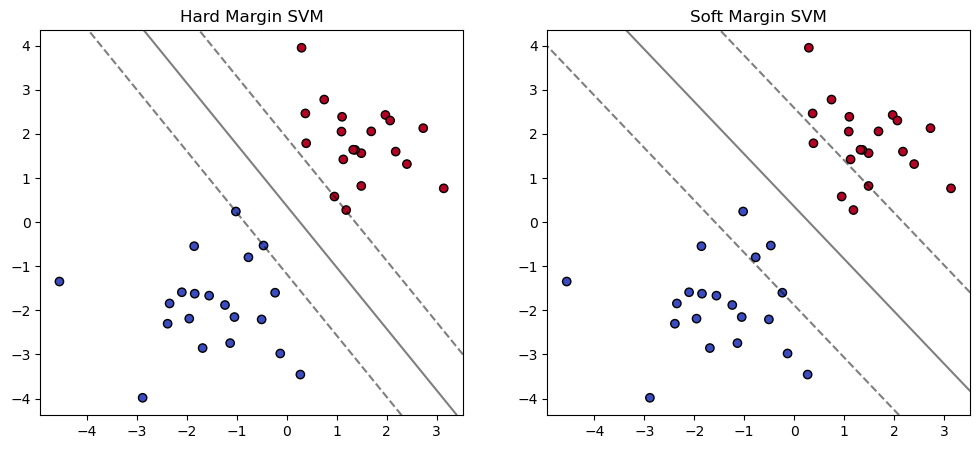

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate example data
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [-1] * 20 + [1] * 20  # Labels

# Fit the SVM model
# Hard margin SVM
hard_margin_model = svm.SVC(kernel='linear', C=1e6)  # High C for hard margin
hard_margin_model.fit(X, y)

# Soft margin SVM
soft_margin_model = svm.SVC(kernel='linear', C=0.1)  # Low C for soft margin
soft_margin_model.fit(X, y)

# Plot the data points and decision boundaries
plt.figure(figsize=(12, 5))

# Hard margin SVM
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = hard_margin_model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.title('Hard Margin SVM')

# Soft margin SVM
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
Z = soft_margin_model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.title('Soft Margin SVM')

plt.show()


1. **Hyperplane**: The solid line represents the hyperplane separating the blue and red data points.

2. **Margin**: The dashed lines represent the margins, and the support vectors are closest data points to the hyperplane. The goal of SVM is to find the hyperplane that maximizes this margin.

3. **Hard Margin vs. Soft Margin**: In SVM, we can have either a hard margin or a soft margin. In a hard-margin SVM, the goal is to find a hyperplane that perfectly separates the classes without allowing any misclassifications. However, in many real-world scenarios, data might not be perfectly separable. In such cases, we use a soft-margin SVM, which allows for some misclassifications to achieve better generalization. Here's an example illustrating the difference between hard and soft margins:


In the left graph, a hard-margin SVM is used. The data is perfectly separable, and the hyperplane (solid line) separates the classes without any misclassifications.

In the right graph, a soft-margin SVM is used. Some data points are allowed to cross the margin or even be misclassified to accommodate the non-linearly separable data.

C: 0.1, Accuracy: 1.0000


ValueError: X has 2 features, but SVC is expecting 4 features as input.

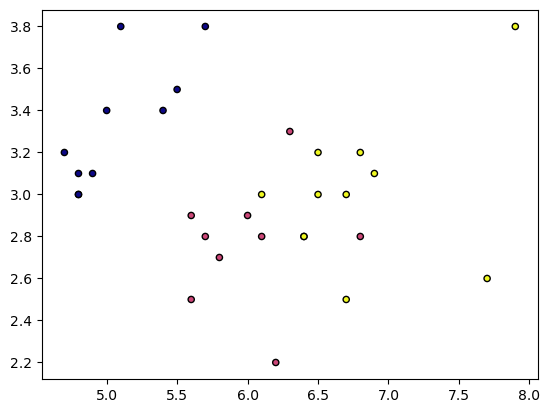

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different C values for exploration
C_values = [0.1, 1, 10, 100]

# Loop through different C values
for C_val in C_values:
  # Train a linear SVM classifier
  svm_clf = SVC(kernel='linear', C=C_val)
  svm_clf.fit(X_train, y_train)

  # Predict labels for the testing set
  y_pred = svm_clf.predict(X_test)

  # Compute accuracy
  accuracy = accuracy_score(y_test, y_pred)

  # Print results for current C value
  print(f"C: {C_val}, Accuracy: {accuracy:.4f}")

  # Plot decision boundary (using the first two features for illustration)
  plt.figure()
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='plasma', edgecolors='k', s=20)

  # Define a mesh grid for plotting the decision boundary
  mesh_w, mesh_h = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 500),
                               np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 500))

  # Obtain decision function values for each point in the mesh
  Z = svm_clf.decision_function(np.c_[mesh_w.ravel(), mesh_h.ravel()])
  Z = Z.reshape(mesh_w.shape)

  # Plot decision boundary and confidence intervals
  plt.contourf(mesh_w, mesh_h, Z, levels=np.arange(-1, 1, 0.1), cmap='coolwarm', alpha=0.8)
  plt.contour(mesh_w, mesh_h, Z, levels=[0], colors='black', linewidth=2)

  # Plot data points again for reference
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='plasma', edgecolors='k', s=20)

  plt.xlabel(iris.feature_names[0])
  plt.ylabel(iris.feature_names[1])
  plt.title(f"SVM Decision Boundary (C={C_val})")
  plt.show()


Accuracy for C=0.01: 0.4
Accuracy for C=0.1: 0.8222222222222222
Accuracy for C=1: 0.8
Accuracy for C=10: 0.8
Accuracy for C=100: 0.8


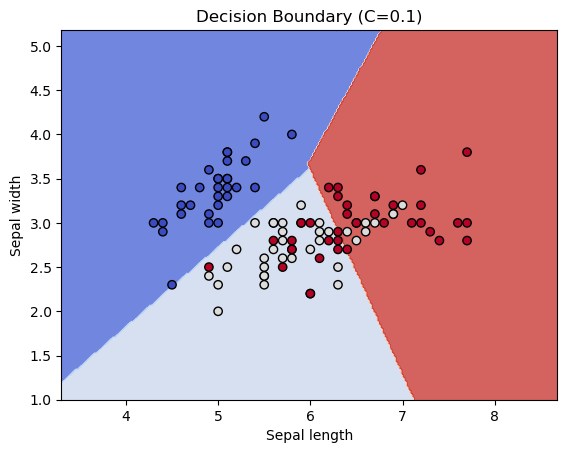

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Selecting only the first two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM classifier
C_values = [0.01, 0.1, 1, 10, 100]  # Different values of the regularization parameter C
accuracies = []

for C in C_values:
    svm_model = SVC(kernel='linear', C=C, random_state=42)
    svm_model.fit(X_train, y_train)

    # Predict the labels for the testing set
    y_pred = svm_model.predict(X_test)

    # Compute the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy for C={C}: {accuracy}")

# Plot the decision boundaries of the trained model using two of the features
def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(title)
    plt.show()

best_C = C_values[np.argmax(accuracies)]
best_model = SVC(kernel='linear', C=best_C, random_state=42)
best_model.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, best_model, f"Decision Boundary (C={best_C})")
